 Machine Learning for a Disaster.
Dataset : Titanic
Target : Who Survived or not... 

In [8]:
# Conectar a google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Dataset
# Listar dicrectorio
%ls

Mounted at /content/drive
/content/drive/MyDrive/Dataset
train.csv


**Dataset File : /content/drive/MyDrive/Dataset/train.csv**


In [9]:
traindir = '/content/drive/MyDrive/Dataset/train.csv'


Import pd,math,plt and seaborn for using soon...

In [10]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
dataset = pd.read_csv(traindir)
print(dataset.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

So the features are : [Name,Sex,Age,SibSp,Parch,Ticket,Far,Cabin,Embarked,Pclass] and the target is 'Survived'

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.



Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df = dataset.drop(['PassengerId','Survived'],axis=1)
l = len(df)

for i,col in enumerate(df.columns):
  cur_null = df[col].isnull().sum()
  percent_null = float(float(cur_null)/float(l))

  print(f'Column {col} percent of null values : ' , round(percent_null,2))



Column Pclass percent of null values :  0.0
Column Name percent of null values :  0.0
Column Sex percent of null values :  0.0
Column Age percent of null values :  0.2
Column SibSp percent of null values :  0.0
Column Parch percent of null values :  0.0
Column Ticket percent of null values :  0.0
Column Fare percent of null values :  0.0
Column Cabin percent of null values :  0.77
Column Embarked percent of null values :  0.0


There are only two columns with missing values : [Age , Cabin]

Defining my EDA functions for Data Analysis

In [52]:
def Scatterplot(df):
    plt.figure(figsize=(20, 10))
    z = 1
    a = len(df.columns.tolist())
    if len(df.columns.tolist()) % 2 == 0:
        if len(df.columns.tolist()) / 4 >= 1:
            y = math.ceil(len(df.columns.tolist())/ 4)
            for x in df.columns.tolist():
                plt.subplot(y, 4, z)
                plt.scatter(x = df[x], y = df[df.columns.tolist()[a-1]])
                plt.title(f"Scatterplot of {df.columns.tolist()[z-1]}")
                z += 1
        else:
            y = math.ceil(len(df.columns.tolist())/ 2)
            for x in df.columns.tolist():
                plt.subplot(y, 2, z)
                plt.scatter(x = df[x], y = df[df.columns.tolist()[a-1]])
                plt.title(f"Scatterplot of {df.columns.tolist()[z-1]}")
                z += 1
    elif len(df.columns.tolist()) == 1:
        plt.figure(figsize=(6, 6))
        plt.scatter(x = df[x], y = df[df.columns.tolist()[a-1]])
        plt.title(f"Scatterplot of {df.columns.tolist()[0]}")
    else:
        y = math.ceil(len(df.columns.tolist())/ 3)
        for x in df.columns.tolist():
            plt.subplot(y, 3, z)
            plt.scatter(x = df[x], y = df[df.columns.tolist()[a-1]])
            plt.title(f"Scatterplot of {df.columns.tolist()[z-1]}")
            z += 1
    plt.show()

def correlation(df):
    plt.figure(figsize=(6, 6))
    mask = np.triu(np.ones_like(df.corr()))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap');

def Histogram(df):
    plt.figure(figsize=(20, 10))
    z = 1
    if len(df.columns.tolist()) % 2 == 0:
        if len(df.columns.tolist()) / 4 >= 1:
            y = math.ceil(len(df.columns.tolist())/ 4)
            for x in df.columns.tolist():
                plt.subplot(y, 4, z)
                plt.hist(df[x])
                plt.title(f"Histogram of {df.columns.tolist()[z-1]}")
                z += 1
        else:
            y = math.ceil(len(df.columns.tolist())/ 2)
            for x in df.columns.tolist():
                plt.subplot(y, 2, z)
                plt.hist(df[x])
                plt.title(f"Histogram of {df.columns.tolist()[z-1]}")
                z += 1
    elif len(df.columns.tolist()) == 1:
        plt.figure(figsize=(6, 6))
        plt.hist(df)
        plt.title(f"Histogram of {df.columns.tolist()[0]}")
    else:
        y = math.ceil(len(df.columns.tolist())/ 3)
        for x in df.columns.tolist():
            plt.subplot(y, 3, z)
            plt.hist(df[x])
            plt.title(f"Histogram of {df.columns.tolist()[z-1]}")
            z += 1
    plt.show()

def Boxplot(df):
    plt.figure(figsize=(15, 15))
    z = 1
    if len(df.columns.tolist()) % 2 == 0:
        if len(df.columns.tolist()) / 4 >= 1:
            y = math.ceil(len(df.columns.tolist())/ 4)
            for x in df.columns.tolist():
                plt.subplot(y, 4, z)
                plt.boxplot(df[x])
                plt.title(f"Boxplot of {df.columns.tolist()[z-1]}")
                z += 1
        else:
            y = math.ceil(len(df.columns.tolist())/ 2)
            for x in df.columns.tolist():
                plt.subplot(y, 2, z)
                plt.boxplot(df[x])
                plt.title(f"Boxplot of {df.columns.tolist()[z-1]}")
                z =+ 1
    else:
        y = math.ceil(len(df.columns.tolist())/ 3)
        for x in df.columns.tolist():
            plt.subplot(y, 3, z)
            plt.boxplot(df[x])
            plt.title(f"Boxplot of {df.columns.tolist()[z-1]}")
            z += 1
    plt.show()

def summary_statistics(df):
    #Print the data shape:
    print(f'Data shape: {df.shape} \n\n')
    print(113*"-")
    print("\nTable of summary: \n")
    #Make a dataframe with all the information + datatypes:
    summ = pd.DataFrame(df.dtypes, columns=['datatype'])
    
    #Show the number missing value:
    summ['#missing'] = df.isnull().sum().values 
    
    #Show the missing value in percentage:
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    
    #Show the unqiue value number:
    summ['#unique'] = df.nunique().values
    
    #Make a describe dataset and transpose it.
    desc = pd.DataFrame(df.describe(include='all').transpose())
    
    #Pick the information from the describe dataset.
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['mean'] = desc['mean'].values
    summ['std'] = desc['std'].values
    
    #Show me the first,second, thirth and last row value.
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    summ['last value'] = df.loc[len(df)-1].values
    
    return summ

def barAlgorithms(algorithms,accuracy):
    
    mn = 1
    for i in accuracy:
      if i<mn:
        mn = i
    # Crear gráfico de barras
    plt.figure(figsize=(10,10))
    colors = ['red' , 'blue' , 'green'] 
    plt.ylim(mn/2 , 1)
    plt.bar(algorithms, accuracy,color=colors)
    plt.xlabel('Algoritmo')
    plt.ylabel('Tasa de acierto')
    plt.title('Comparación de algoritmos de aprendizaje automático')

    for i,value in enumerate(accuracy):
      plt.text(i,value+0.02,f'{round(value*100,4)}%',ha='center')
    plt.show()

***EDA WORK:)***

In [15]:
df = dataset.drop(['PassengerId','Survived'],axis=1)
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

For the feature Name , I will mantain only the prefix of the name , for example : 'Mr' , 'Miss' or anything else.

In [17]:
dataset['Name_pref'] = [name[(name.find(',') + 1):name.find('.')+1] for name in dataset['Name'] if name.find('.') != -1]
df = dataset.drop(['Name','Survived','PassengerId','Cabin'],axis=1)

for i,col in enumerate(df.columns):
  print(f"Column {col} unique values: " , len(df[col].unique()))

Column Pclass unique values:  3
Column Sex unique values:  2
Column Age unique values:  89
Column SibSp unique values:  7
Column Parch unique values:  7
Column Ticket unique values:  681
Column Fare unique values:  248
Column Embarked unique values:  4
Column Name_pref unique values:  17


It look's much better now ✌

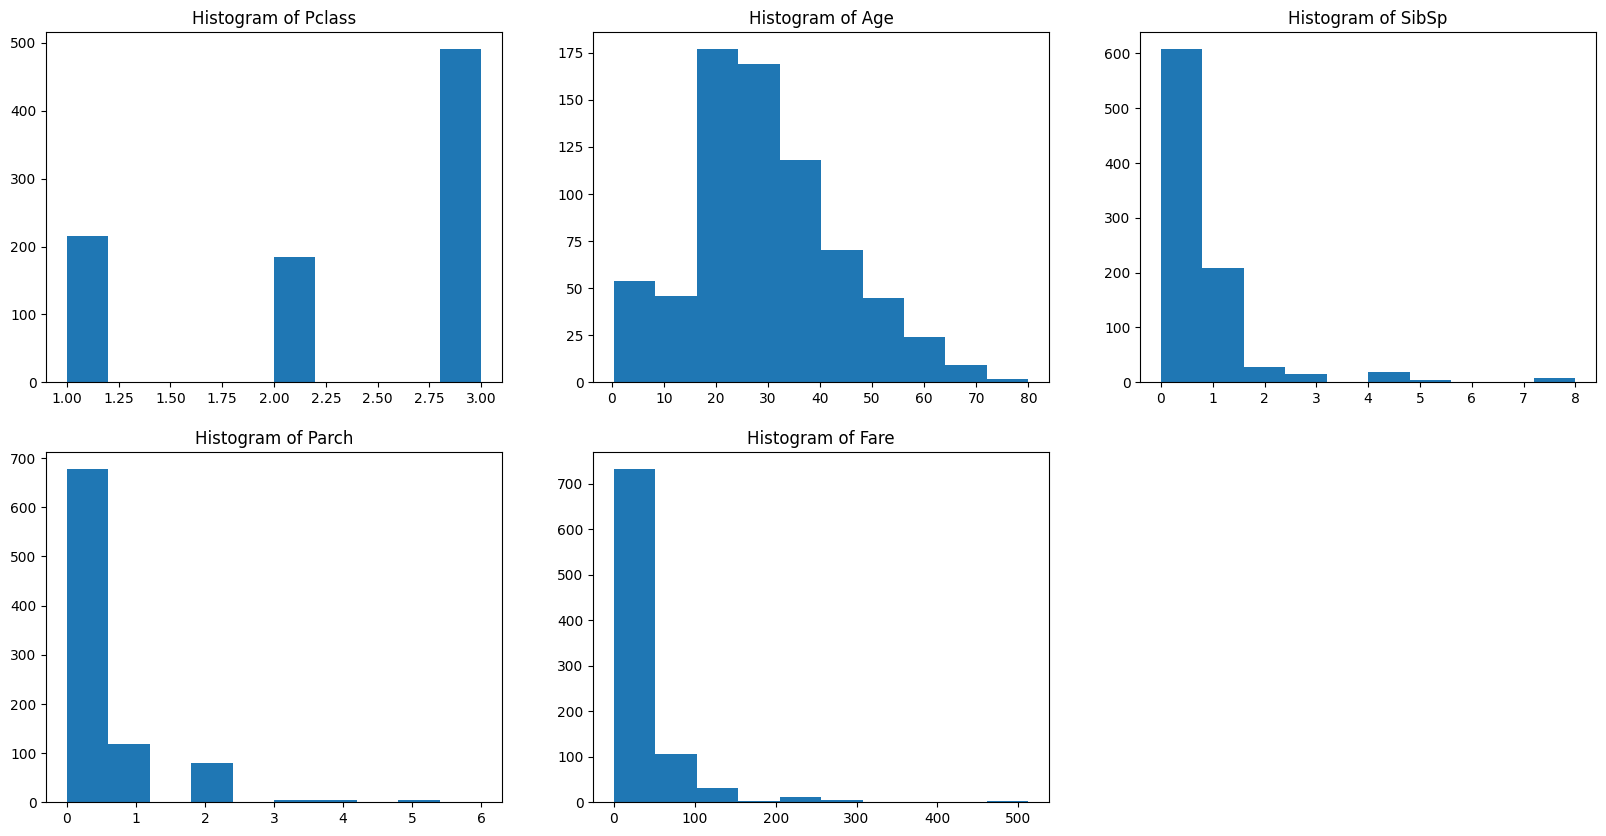

In [18]:
numerical_features = [col for col in df.columns if df[col].dtype != 'object']
categorical_features = [col for col in df.columns if df[col].dtype=='object']

#applying One Hot Encoder for categorical columns
df_without_categorical = pd.get_dummies(df,columns=categorical_features)

Histogram(df_without_categorical[numerical_features])

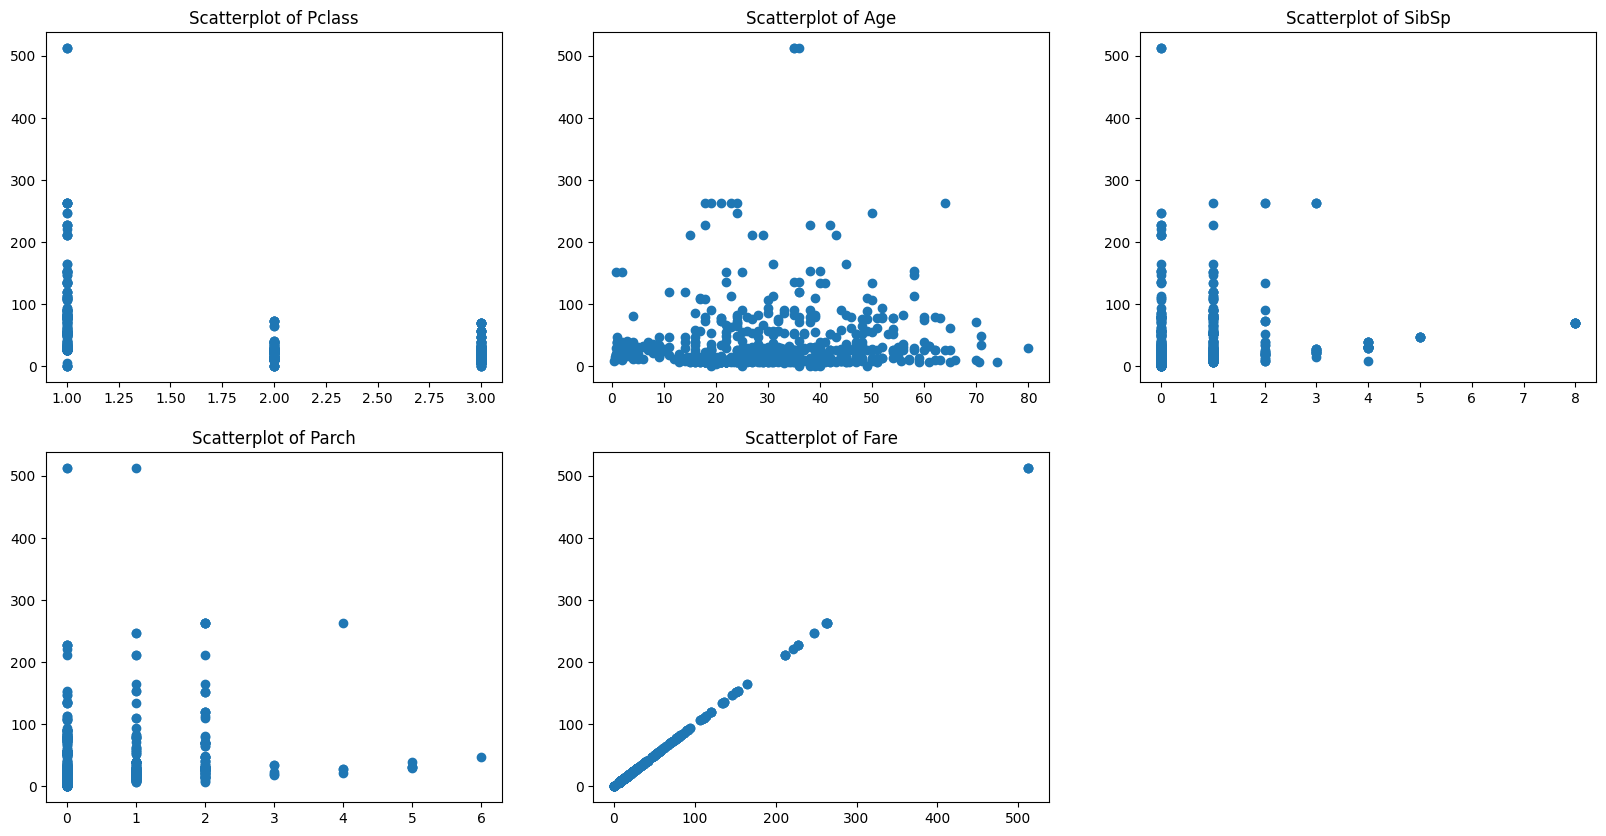

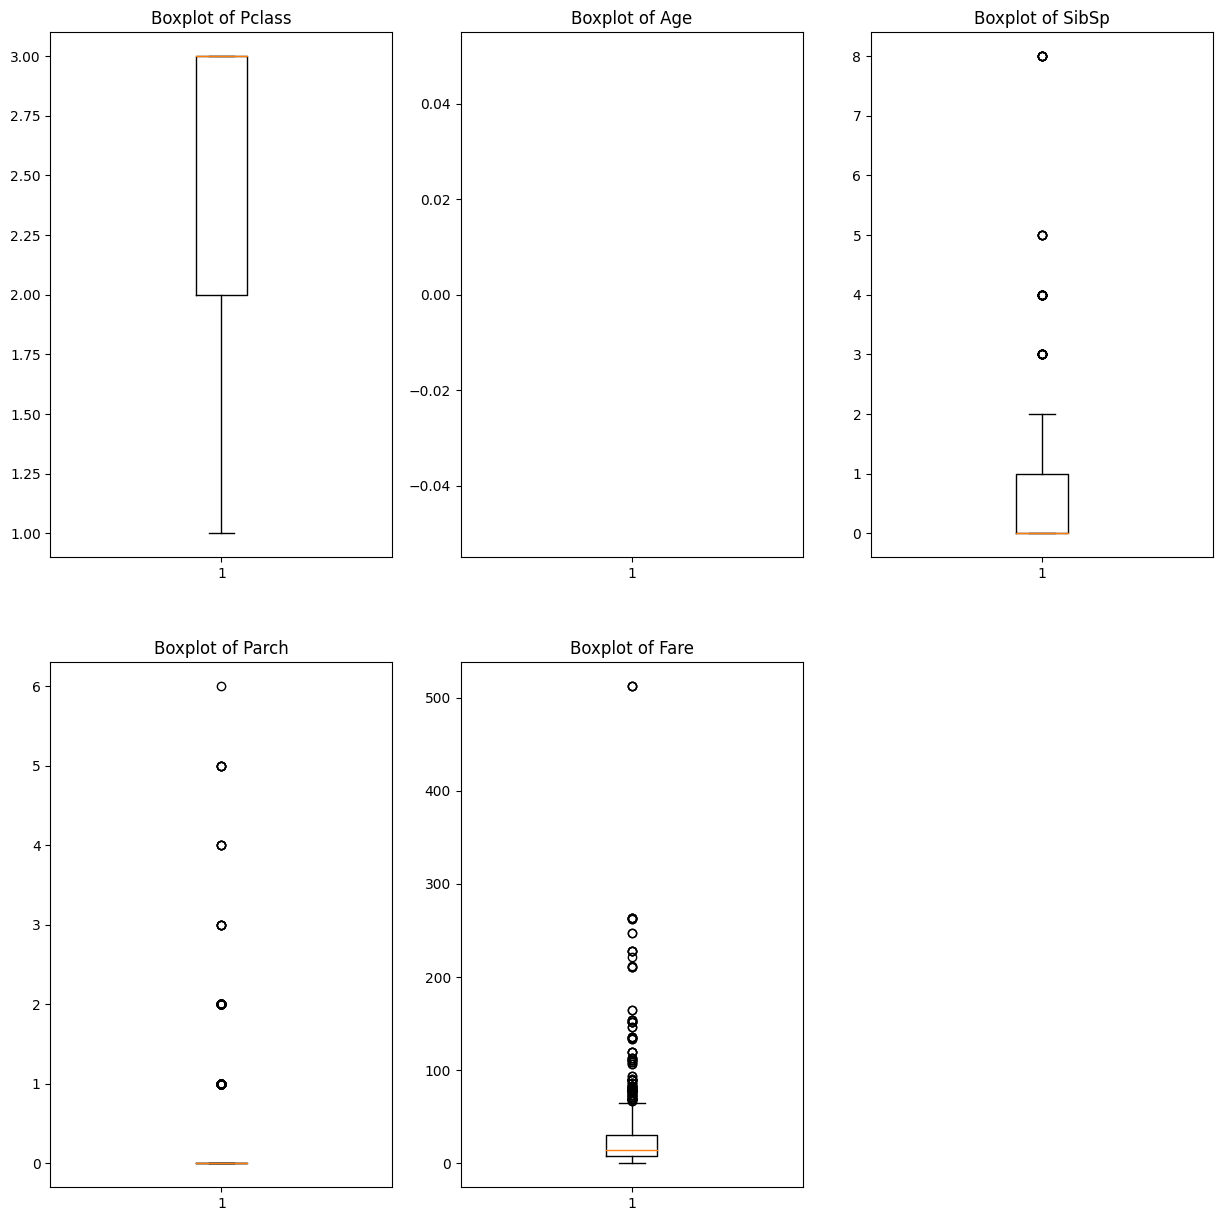

In [19]:
df_ = df_without_categorical
Scatterplot(df_[numerical_features])
Boxplot(df_[numerical_features])


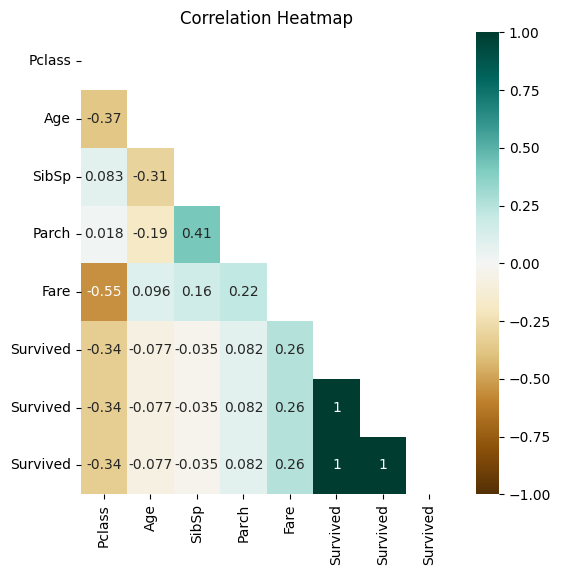

In [24]:
#correlation between features
num = numerical_features
correlation(dataset[num])

***AS WE SEE THE CORRELATION BETWEEN PARCH AND SIBSP IS TOO MUCH : 0.41***
That's mean SibSP and parh are correlated 


sibsp # of siblings / spouses aboard the Titanic
parch # of parents / children aboard the Titanic 
So looks good idea merge them into one feature 
So family_size = sibsp + parch + 1
+ 1 because we need to count the housband well

In [25]:
df_['family_size'] = df_['Parch'] + df_['SibSp'] + 1
df_ = df_.drop(['Parch','SibSp'],axis=1)


So we need to do something for missing values in Age , so a good strategy is mean of all existing values . For that I'll use a Imputer.

In [26]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'mean')
df_['Age'] = my_imputer.fit_transform(df_[['Age']])

summary_statistics(df_)



Data shape: (891, 707) 


-----------------------------------------------------------------------------------------------------------------

Table of summary: 



,datatype,#missing,%missing,#unique,min,max,mean,std,first value,second value,third value,last value
Pclass,int64,0,0.0,3,1.00,3.0000,2.308642,0.836071,3.00,1.0000,3.000,3.00
Age,float64,0,0.0,89,0.42,80.0000,29.699118,13.002015,22.00,38.0000,26.000,32.00
Fare,float64,0,0.0,248,0.00,512.3292,32.204208,49.693429,7.25,71.2833,7.925,7.75
Sex_female,uint8,0,0.0,2,0.00,1.0000,0.352413,0.477990,0.00,1.0000,1.000,0.00
Sex_male,uint8,0,0.0,2,0.00,1.0000,0.647587,0.477990,1.00,0.0000,0.000,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
Name_pref_ Ms.,uint8,0,0.0,2,0.00,1.0000,0.001122,0.033501,0.00,0.0000,0.000,0.00
Name_pref_ Rev.,uint8,0,0.0,2,0.00,1.0000,0.006734,0.081830,0.00,0.0000,0.000,0.00
Name_pref_ Sir.,uint8,0,0.0,2,0.00,1.0000,0.001122,0.033501,0.00,0.0000,0.000,0.00
Name_pref_ the Countess.,uint8,0,0.0,2,0.00,1.0000,0.001122,0.033501,0.00,0.0000,0.000,0.00


We are ready for training the model with the data...

So I will use three models : ['Random Forest Classifier' , 'KNN' , 'Suppervized Vector Machine']

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [36]:
models = [KNeighborsClassifier(n_neighbors=21,n_jobs=-1),SVC(C= 1000, gamma=0.001),
          RandomForestClassifier(n_estimators=1000)]
models_names = ['KNN' , 'SVM Classifier' , 'RandomForest']
accuracy_scores = []



In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
#We will use Cross_validation

def evaluate_model(model,X,y):
  model.fit(X,y)

  pred = cross_val_predict(model,X,y,cv=10)
  ac = accuracy_score(pred,y)
  return ac


In [54]:
X = df_.drop(['Fare'],axis=1)
print(df_)
y = dataset['Survived']
accuracy_scores = []
for i,model in enumerate(models):
  ac = evaluate_model(model,X,y)
  print(f"Using the model {models_names[i]} with accuracy percent: ", round(ac * 100 , 4))
  accuracy_scores.append(ac)



     Pclass        Age     Fare  Sex_female  Sex_male  Ticket_110152  \
0         3  22.000000   7.2500           0         1              0   
1         1  38.000000  71.2833           1         0              0   
2         3  26.000000   7.9250           1         0              0   
3         1  35.000000  53.1000           1         0              0   
4         3  35.000000   8.0500           0         1              0   
..      ...        ...      ...         ...       ...            ...   
886       2  27.000000  13.0000           0         1              0   
887       1  19.000000  30.0000           1         0              0   
888       3  29.699118  23.4500           1         0              0   
889       1  26.000000  30.0000           0         1              0   
890       3  32.000000   7.7500           0         1              0   

     Ticket_110413  Ticket_110465  Ticket_110564  Ticket_110813  ...  \
0                0              0              0              0

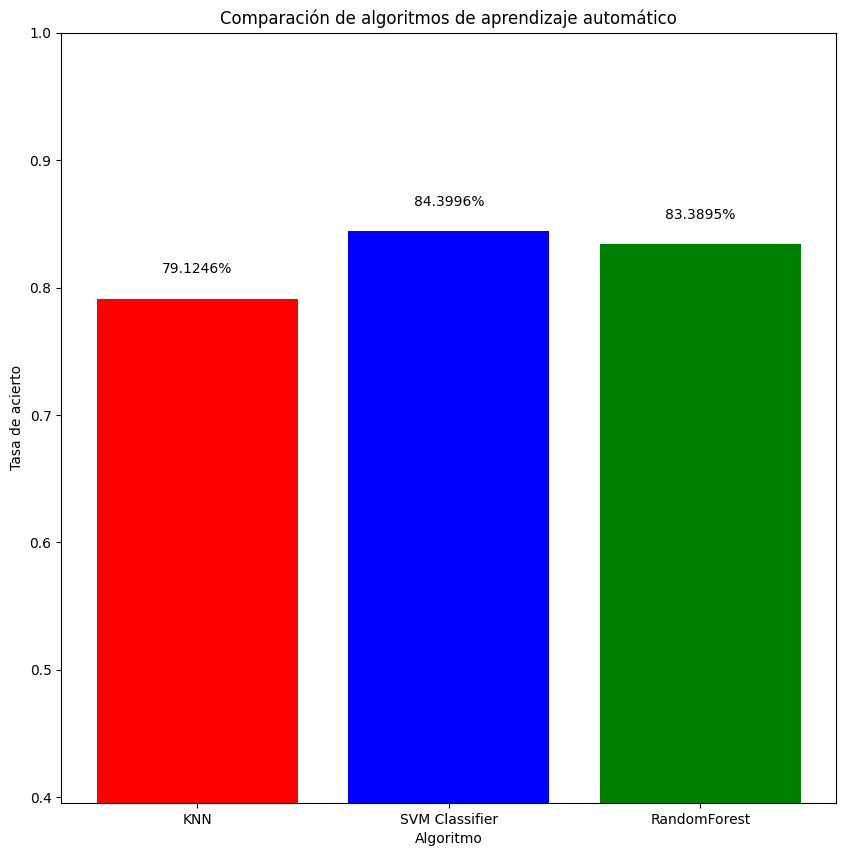

In [55]:
#show the results
barAlgorithms(models_names,accuracy_scores)

**As we see the better model for now is Suppervized Vector Machine Classifier.**

***Let's try others different approach***

ModuleNotFoundError: ignored